In [16]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd

In [17]:
la_house_data = pd.read_csv('house.csv')
la_rentals_data = pd.read_csv('rentals.csv')
la_crime_data = pd.read_csv('crime.csv')
la_crimepart2_data = pd.read_csv('crime2.csv')

In [18]:
##House Data

In [19]:
la_house_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,235550.865783,236804.424224,...,766114.299684,758639.432137,750293.716377,744028.500725,741488.700670,741298.029783,741575.186820,740691.052946,738808.063960,736313.525744
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,218478.462978,218809.263155,...,917738.108781,909361.782857,896369.374432,882461.605958,876081.262969,876382.820293,882061.422058,893109.207983,908239.630462,923738.792609
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,100297.874172,100272.391119,...,263598.270805,262339.689966,260951.807833,259995.173694,259678.538399,259938.917731,260804.865892,261741.416701,262693.207077,263147.021375
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,142248.510678,142286.515196,...,281841.615699,280705.561433,279762.083842,279583.337973,280432.022116,281427.291609,282528.653860,283803.630992,285605.577895,287336.543328
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,96933.250693,97023.242072,...,263605.281058,262968.454602,261889.926088,260698.838480,259680.449184,259450.993070,259759.812867,259982.077074,260117.225529,259674.787691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,39180,30116,Jumpertown,city,MS,MS,"Tupelo, MS",Prentiss County,NaN,NaN,...,135453.605402,132839.122698,131152.357006,129908.935871,130695.981121,132497.402291,133492.813038,133304.185529,131701.084409,130994.819340
21610,51728,30116,Dollar Bay,city,MI,MI,"Houghton, MI",Houghton County,NaN,NaN,...,134724.201721,135689.852329,135965.144386,136688.659351,137724.874016,139966.935716,141591.333188,142175.541803,143084.647012,143749.607752
21611,4769,30116,Fort Howard,city,MD,MD,"Baltimore-Columbia-Towson, MD",Baltimore County,NaN,NaN,...,293710.858689,293370.556142,293425.355035,294938.132483,296705.704439,299505.067783,302015.306707,304143.433657,305960.946402,307104.074517
21612,25149,30116,Hoisington,city,KS,KS,"Great Bend, KS",Barton County,NaN,NaN,...,71533.605468,70315.760828,69226.802449,68891.552242,69542.746246,70367.143758,71123.721859,72459.774970,74394.262507,76691.661934


In [20]:
la_house_data = pd.read_csv('house.csv', usecols=['RegionName', 'State', '2017-01-31', '2017-02-28', '2017-03-31', 
                                       '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', 
                                       '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
                                       'RegionName', 'State', '2018-01-31', '2018-02-28', '2018-03-31', 
                                       '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', 
                                       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
                                       'RegionName', 'State', '2019-01-31', '2019-02-28', '2019-03-31', 
                                       '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', 
                                       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
                                       'RegionName', 'State', '2020-01-31', '2020-02-29', '2020-03-31', 
                                       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', 
                                       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
                                       'RegionName', 'State', '2021-01-31', '2021-02-28', '2021-03-31', 
                                       '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', 
                                       '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
                                       'RegionName', 'State', '2022-01-31', '2022-02-28', '2022-03-31', 
                                       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', 
                                       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
                                       'RegionName', 'State', '2023-01-31', '2023-02-28', '2023-03-31', 
                                       '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', 
                                       '2023-09-30'])
new_df = pd.DataFrame(la_house_data.loc[1])
new_df

,1
RegionName,Los Angeles
State,CA
2017-01-31,537563.770251
2017-02-28,550452.833449
2017-03-31,565356.821542
...,...
2023-05-31,876382.820293
2023-06-30,882061.422058
2023-07-31,893109.207983
2023-08-31,908239.630462


In [21]:
la_df = la_house_data.iloc[1:2]
la_df

,RegionName,State,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
1,Los Angeles,CA,537563.770251,550452.833449,565356.821542,576975.986496,585296.548285,592214.087729,591859.034286,588024.351516,...,917738.108781,909361.782857,896369.374432,882461.605958,876081.262969,876382.820293,882061.422058,893109.207983,908239.630462,923738.792609


In [22]:
la_df.hvplot(kind="bar")

:Bars   [index,Variable]   (value)

In [23]:
##Rental Data

In [24]:
la_rentals_data

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-01-31,2015-02-28,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2685.685047,2702.041266,...,3446.710150,3437.465021,3451.882101,3476.266421,3512.210173,3558.715063,3605.870535,3638.511416,3648.640681,3643.197805
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1917.144339,1931.914114,...,2873.682789,2869.509291,2874.218695,2879.792080,2893.798796,2895.560729,2899.251666,2902.706113,2909.368882,2911.791748
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1224.084568,1228.626299,...,1553.018058,1562.154104,1570.425719,1578.754686,1582.360925,1589.519683,1598.578912,1605.471535,1604.053794,1601.306067
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1513.336535,1523.389100,...,1931.649962,1941.210461,1956.115917,1973.247008,1990.269360,2016.660215,2039.963054,2052.074172,2055.278229,2044.828382
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1013.002828,1017.540021,...,1461.934472,1469.300284,1469.570450,1475.690602,1476.416335,1480.769911,1478.603386,1479.219036,1478.871311,1476.021874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,16007,20473,Surf City,city,NC,NC,"Wilmington, NC",Pender County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493.796524,2500.000000
3273,6459,21395,Pendergrass,city,GA,GA,"Jefferson, GA",Jackson County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.382915,2111.166161,2024.166667
3274,124999,22469,Lake Hart,city,FL,FL,"Orlando-Kissimmee-Sanford, FL",Orange County,NaN,NaN,...,NaN,NaN,NaN,2267.419020,2230.400662,2257.538532,2299.370930,2307.327211,2273.440046,2215.061111
3275,30203,24266,Amagansett,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39999.833333


In [25]:
la_rentals = la_rentals_data.drop(la_rentals_data.iloc[:, 8:20], axis = 1)

In [26]:
la_rentals

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2016-01-31,2016-02-29,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2785.348589,2787.295257,...,3446.710150,3437.465021,3451.882101,3476.266421,3512.210173,3558.715063,3605.870535,3638.511416,3648.640681,3643.197805
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2073.817547,2095.259290,...,2873.682789,2869.509291,2874.218695,2879.792080,2893.798796,2895.560729,2899.251666,2902.706113,2909.368882,2911.791748
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1256.859218,1256.110573,...,1553.018058,1562.154104,1570.425719,1578.754686,1582.360925,1589.519683,1598.578912,1605.471535,1604.053794,1601.306067
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1565.630260,1577.930339,...,1931.649962,1941.210461,1956.115917,1973.247008,1990.269360,2016.660215,2039.963054,2052.074172,2055.278229,2044.828382
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1057.581428,1060.869555,...,1461.934472,1469.300284,1469.570450,1475.690602,1476.416335,1480.769911,1478.603386,1479.219036,1478.871311,1476.021874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,16007,20473,Surf City,city,NC,NC,"Wilmington, NC",Pender County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2493.796524,2500.000000
3273,6459,21395,Pendergrass,city,GA,GA,"Jefferson, GA",Jackson County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962.382915,2111.166161,2024.166667
3274,124999,22469,Lake Hart,city,FL,FL,"Orlando-Kissimmee-Sanford, FL",Orange County,NaN,NaN,...,NaN,NaN,NaN,2267.419020,2230.400662,2257.538532,2299.370930,2307.327211,2273.440046,2215.061111
3275,30203,24266,Amagansett,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39999.833333


In [27]:
la_rentals2 = la_rentals.iloc[1:2]
la_rentals2

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2016-01-31,2016-02-29,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2073.817547,2095.25929,...,2873.682789,2869.509291,2874.218695,2879.79208,2893.798796,2895.560729,2899.251666,2902.706113,2909.368882,2911.791748


<Axes: >

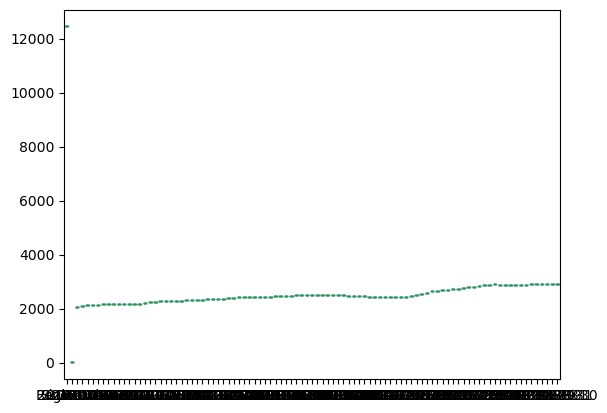

In [28]:
la_rentals2.plot(kind="box")

<Axes: >

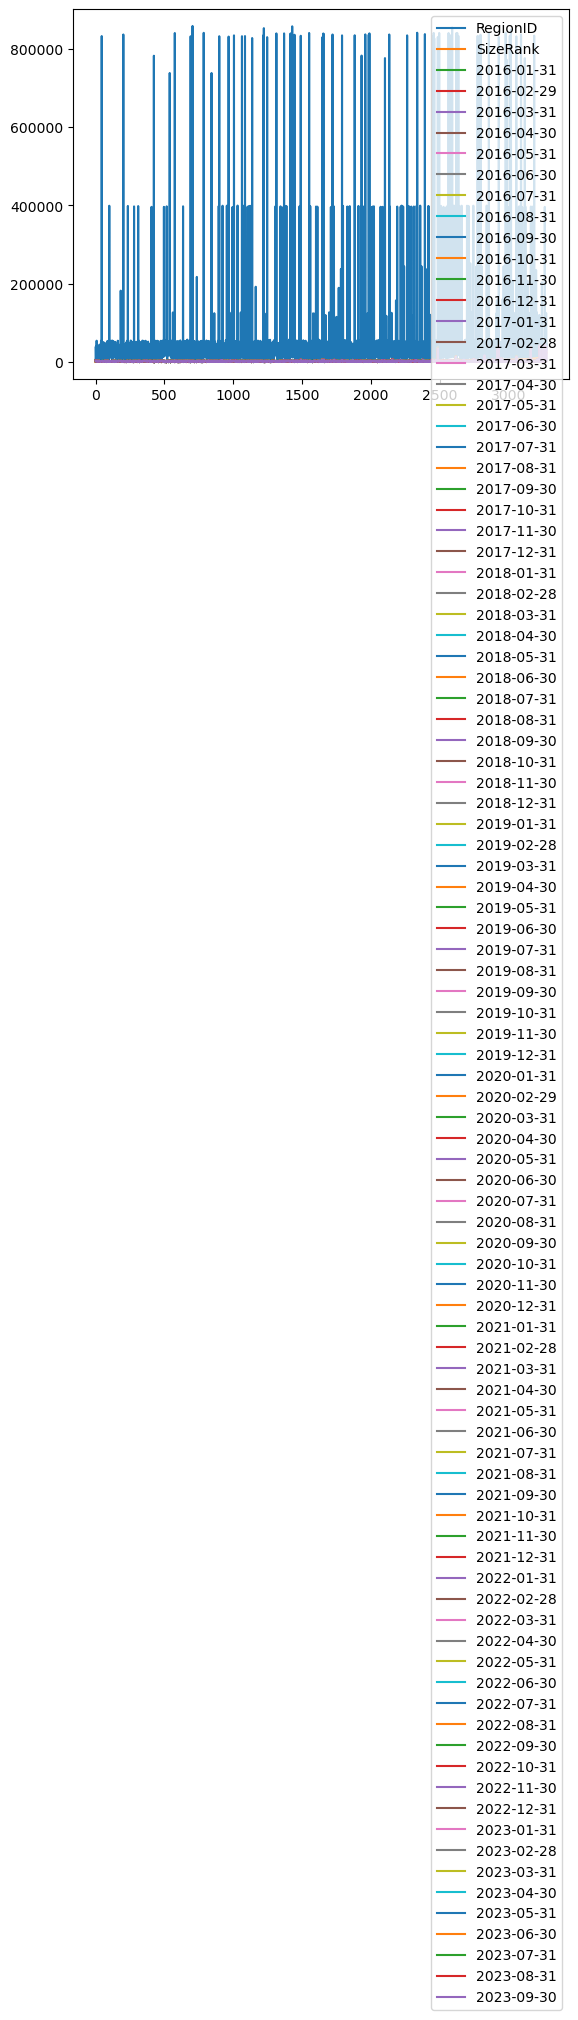

In [29]:
la_rentals.plot()

In [30]:
##Crime Data

In [31]:
la_crime_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135556,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2135557,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2135558,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2135559,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [32]:
la_crime_data_df = pd.read_csv('crime.csv', usecols=['Date Rptd', 'AREA NAME', 'Crm Cd Desc', 'LOCATION', 'LAT', 'LON'])
la_crime_data_df

,Date Rptd,AREA NAME,Crm Cd Desc,LOCATION,LAT,LON
0,02/20/2010 12:00:00 AM,Newton,VIOLATION OF COURT ORDER,300 E GAGE AV,33.9825,-118.2695
1,09/13/2010 12:00:00 AM,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",SEPULVEDA BL,33.9599,-118.3962
2,08/09/2010 12:00:00 AM,Newton,OTHER MISCELLANEOUS CRIME,1300 E 21ST ST,34.0224,-118.2524
3,01/05/2010 12:00:00 AM,Hollywood,VIOLATION OF COURT ORDER,CAHUENGA BL,34.1016,-118.3295
4,01/03/2010 12:00:00 AM,Central,"RAPE, ATTEMPTED",8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...
2135556,02/22/2019 12:00:00 AM,Harbor,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,100 W 22ND ST,33.7257,-118.2801
2135557,03/28/2019 12:00:00 AM,Hollywood,ARSON,1400 N LA BREA AV,34.0962,-118.3490
2135558,01/06/2019 12:00:00 AM,Olympic,CRIMINAL THREATS - NO WEAPON DISPLAYED,6TH,34.0637,-118.2870
2135559,10/17/2019 12:00:00 AM,Devonshire,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17200 NAPA ST,34.2266,-118.5085


In [33]:
la_crime_data_df.tail(534988)

,Date Rptd,AREA NAME,Crm Cd Desc,LOCATION,LAT,LON
1600573,06/10/2017 12:00:00 AM,West LA,BURGLARY,3300 PATRICIA AV,34.0330,-118.4063
1600574,01/01/2017 12:00:00 AM,Southwest,VANDALISM - MISDEAMEANOR ($399 OR UNDER),4000 HILLCREST DR,34.0138,-118.3465
1600575,03/17/2017 12:00:00 AM,Newton,VEHICLE - STOLEN,52ND PL,33.9947,-118.2783
1600576,03/16/2017 12:00:00 AM,Harbor,BRANDISH WEAPON,1500 W 210TH ST,33.8392,-118.3056
1600577,11/19/2017 12:00:00 AM,Central,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),7TH,34.0452,-118.2534
...,...,...,...,...,...,...
2135556,02/22/2019 12:00:00 AM,Harbor,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,100 W 22ND ST,33.7257,-118.2801
2135557,03/28/2019 12:00:00 AM,Hollywood,ARSON,1400 N LA BREA AV,34.0962,-118.3490
2135558,01/06/2019 12:00:00 AM,Olympic,CRIMINAL THREATS - NO WEAPON DISPLAYED,6TH,34.0637,-118.2870
2135559,10/17/2019 12:00:00 AM,Devonshire,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17200 NAPA ST,34.2266,-118.5085


In [34]:
la_crime2 = la_crime_data_df.tail(534988)
la_crime2

,Date Rptd,AREA NAME,Crm Cd Desc,LOCATION,LAT,LON
1600573,06/10/2017 12:00:00 AM,West LA,BURGLARY,3300 PATRICIA AV,34.0330,-118.4063
1600574,01/01/2017 12:00:00 AM,Southwest,VANDALISM - MISDEAMEANOR ($399 OR UNDER),4000 HILLCREST DR,34.0138,-118.3465
1600575,03/17/2017 12:00:00 AM,Newton,VEHICLE - STOLEN,52ND PL,33.9947,-118.2783
1600576,03/16/2017 12:00:00 AM,Harbor,BRANDISH WEAPON,1500 W 210TH ST,33.8392,-118.3056
1600577,11/19/2017 12:00:00 AM,Central,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),7TH,34.0452,-118.2534
...,...,...,...,...,...,...
2135556,02/22/2019 12:00:00 AM,Harbor,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,100 W 22ND ST,33.7257,-118.2801
2135557,03/28/2019 12:00:00 AM,Hollywood,ARSON,1400 N LA BREA AV,34.0962,-118.3490
2135558,01/06/2019 12:00:00 AM,Olympic,CRIMINAL THREATS - NO WEAPON DISPLAYED,6TH,34.0637,-118.2870
2135559,10/17/2019 12:00:00 AM,Devonshire,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17200 NAPA ST,34.2266,-118.5085


In [35]:
la_crime3 = la_crime2.head()
la_crime3

,Date Rptd,AREA NAME,Crm Cd Desc,LOCATION,LAT,LON
1600573,06/10/2017 12:00:00 AM,West LA,BURGLARY,3300 PATRICIA AV,34.0330,-118.4063
1600574,01/01/2017 12:00:00 AM,Southwest,VANDALISM - MISDEAMEANOR ($399 OR UNDER),4000 HILLCREST DR,34.0138,-118.3465
1600575,03/17/2017 12:00:00 AM,Newton,VEHICLE - STOLEN,52ND PL,33.9947,-118.2783
1600576,03/16/2017 12:00:00 AM,Harbor,BRANDISH WEAPON,1500 W 210TH ST,33.8392,-118.3056
1600577,11/19/2017 12:00:00 AM,Central,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),7TH,34.0452,-118.2534


In [36]:
la_crimepart2_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834315,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
834316,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
834317,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
834318,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [37]:
la_crimepart2 = pd.read_csv('crime2.csv', usecols=['Date Rptd', 'AREA NAME', 'Crm Cd Desc', 'LOCATION', 'LAT', 'LON'])
la_crimepart2

,Date Rptd,AREA NAME,Crm Cd Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...
834315,01/27/2023 12:00:00 AM,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",12500 BRANFORD ST,34.2466,-118.4054
834316,03/22/2023 12:00:00 AM,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",12800 FILMORE ST,34.2790,-118.4116
834317,04/12/2023 12:00:00 AM,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",6100 S VERMONT AV,33.9841,-118.2915
834318,07/02/2023 12:00:00 AM,Central,PICKPOCKET,500 S MAIN ST,34.0467,-118.2485


In [38]:
la_crimepart2.head()

,Date Rptd,AREA NAME,Crm Cd Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.2198,-118.4468
